# 1. Problem definition

Use machine learning to determine which physiochemical properties make a wine 'good'! 

# 2. Data

The dataset is available in Kaggle. 
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

# 3. Evaluation
> Not definied
# 4. Features

Input variables (based on physicochemical tests):

* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol
Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)

### Importing the tools


In [93]:
# Import all the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor


# metrics

from sklearn.metrics import r2_score, roc_curve, mean_absolute_error, mean_squared_error, auc
from sklearn.metrics import roc_auc_score




# Load data / EDA

In [4]:
df = pd.read_csv('data/winequality-red.csv')

In [14]:
df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Check if there are missing data
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

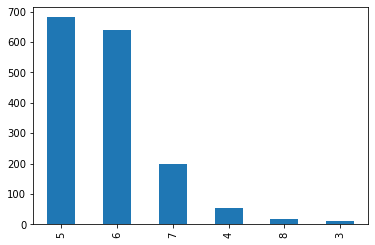

In [12]:
df['quality'].value_counts().plot(kind='bar')

# 5. Modelling

In [64]:
models = {
#     'SGDRegressor': SGDRegressor(),
    'ElasticNet' : ElasticNet(),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor()
}

In [65]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

baselines_scores = {}
for label, model in models.items():
    
    
    model.fit(X_train, y_train)
    baselines_scores[label] = model.score(X_test, y_test) 
    




In [66]:
baselines_scores

{'ElasticNet': 0.009019575821047732,
 'LinearRegression': 0.28136826509646573,
 'RandomForestRegressor': 0.457559651463491}

In [67]:
df_scores = pd.DataFrame({'name':baselines_scores.keys(), 'values':baselines_scores.values()})

df_scores

,name,values
0,ElasticNet,0.009020
1,LinearRegression,0.281368
2,RandomForestRegressor,0.457560


Text(0, 0.5, 'Score')

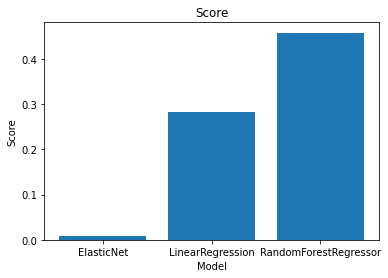

In [85]:
fig, ax = plt.subplots()
ax.bar(df_scores['name'], df_scores['values'])
plt.title('Score')
plt.xlabel('Model')
plt.ylabel('Score')
# ax.set_xticks(df_scores['name'], minor=False);

In [86]:
model = models['RandomForestRegressor']

In [94]:
y_preds = model.predict(X_test)

In [95]:
r2_score(y_test, y_preds)

0.457559651463491

In [96]:
mean_absolute_error(y_test, y_preds)

0.3850625

In [97]:
mean_squared_error(y_test, y_preds)

0.3216025

In [98]:
model.feature_importances_

array([0.05240009, 0.12796804, 0.04613636, 0.05192814, 0.06074969,
       0.04488878, 0.08004391, 0.05357114, 0.05314169, 0.14028951,
       0.28888264])

In [106]:
df_feature = pd.DataFrame({'Feature':list(df.drop('quality',axis=1).columns), 'FeatureImportance':model.feature_importances_})

In [107]:
df_feature

,Feature,FeatureImportance
0,fixed acidity,0.052400
1,volatile acidity,0.127968
2,citric acid,0.046136
3,residual sugar,0.051928
4,chlorides,0.060750
5,free sulfur dioxide,0.044889
6,total sulfur dioxide,0.080044
7,density,0.053571
8,pH,0.053142
9,sulphates,0.140290


<BarContainer object of 11 artists>

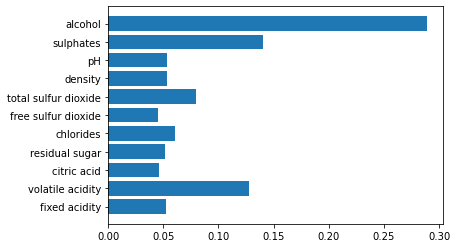

In [116]:
fig, ax = plt.subplots()
ax.barh(df_feature['Feature'], df_feature['FeatureImportance'])

# Conclusion

With RandomForestRegressor I get the best score and we see the most important feature it is Alcohol